Q1. What is the Probability density function?

ans. **Probability Density Function (PDF)** is a function that describes the likelihood of a continuous random variable taking on a specific value.

* For a continuous variable $X$, the PDF $f(x)$ gives the relative likelihood of $X$ being near the value $x$.

* The probability that $X$ lies between two values $a$ and $b$ is the area under the curve of $f(x)$ from $a$ to $b$:

  $$
  P(a \leq X \leq b) = \int_a^b f(x) \, dx
  $$

* Important properties of PDF:

  * $f(x) \geq 0$ for all $x$
  * The total area under the curve is 1: $\int_{-\infty}^\infty f(x) \, dx = 1$
  * The probability that $X$ takes any exact value is 0: $P(X = x) = 0$ for continuous variables



Q2. What are the types of Probability distribution?

ans.
Probability distributions are mainly classified into two types based on the type of random variable:



### 1. Discrete Probability Distribution

* Used for **discrete random variables** (variables with countable outcomes).
* Lists the probabilities for each possible value.
* Examples:

  * **Binomial Distribution** — number of successes in fixed trials.
  * **Poisson Distribution** — number of events in fixed interval.
  * **Geometric Distribution** — number of trials until first success.

### 2. Continuous Probability Distribution

* Used for **continuous random variables** (variables that can take any value within an interval).
* Described by a **Probability Density Function (PDF)**.
* Probability is calculated over intervals, not exact values.
* Examples:

  * **Normal Distribution** (Gaussian) — symmetric bell curve.
  * **Exponential Distribution** — time between events.
  * **Uniform Distribution** — equal probability across an interval.




Q3. Write a Python function to calculate the probability density function of a normal distribution with given mean and standard deviation at a given point.


In [1]:
import math

def normal_pdf(x, mu, sigma):
    """
    Calculate the Probability Density Function (PDF) of a normal distribution.

    Parameters:
    x (float): Point at which PDF is calculated
    mu (float): Mean of the normal distribution
    sigma (float): Standard deviation of the normal distribution

    Returns:
    float: PDF value at point x
    """
    coefficient = 1 / (sigma * math.sqrt(2 * math.pi))
    exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
    return coefficient * math.exp(exponent)

# Example usage:
x = 1.5
mu = 0
sigma = 1
pdf_value = normal_pdf(x, mu, sigma)
print(f"PDF at x={x} for N({mu}, {sigma}^2): {pdf_value:.5f}")


PDF at x=1.5 for N(0, 1^2): 0.12952



 Q4. What are the properties of Binomial distribution? Give two examples of events where binomial distribution can be applied.



### Properties of Binomial Distribution:

1. **Fixed number of trials (n):** The experiment is conducted a fixed number of times.
2. **Two possible outcomes:** Each trial results in either success or failure.
3. **Constant probability (p):** Probability of success remains the same in every trial.
4. **Independent trials:** The outcome of one trial does not affect others.
5. **Discrete random variable:** Counts the number of successes in n trials.
6. **Possible values of the random variable:** The number of successes ranges from 0 to n.



### Binomial Distribution Formula:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

where

* $n$ = total number of trials,
* $k$ = number of successes,
* $p$ = probability of success in each trial.



### Examples where Binomial Distribution is applied:

1. **Flipping a coin 10 times:** Counting the number of heads (successes), where each flip is independent and $p = 0.5$.

2. **Quality control in manufacturing:** Inspecting 100 products where each product has a fixed probability (e.g., 2%) of being defective, and counting how many defective items occur.


Q5. Generate a random sample of size 1000 from a binomial distribution with probability of success 0.4 and plot a histogram of the results using matplotlib.


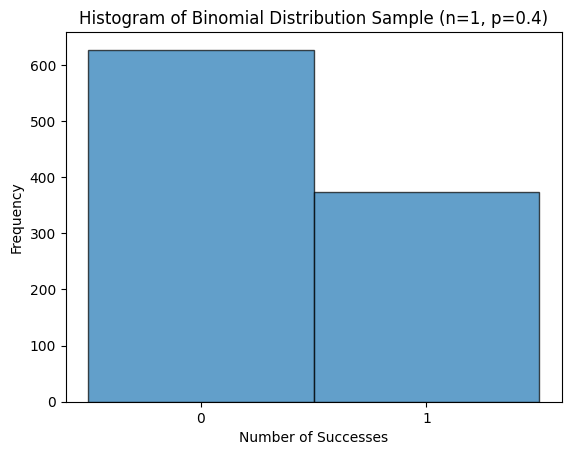

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_trials = 1          # Number of trials per experiment (for binomial, 1 means Bernoulli)
p_success = 0.4       # Probability of success
sample_size = 1000    # Number of experiments/samples

# Generate random sample from binomial distribution
# If you want multiple trials per experiment, increase n_trials, e.g. n_trials=10
sample = np.random.binomial(n=1, p=p_success, size=sample_size)

# Plot histogram
plt.hist(sample, bins=np.arange(-0.5, 2), edgecolor='black', alpha=0.7)
plt.title('Histogram of Binomial Distribution Sample (n=1, p=0.4)')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.show()


Q6. Write a Python function to calculate the cumulative distribution function of a Poisson distribution with given mean at a given point.


In [3]:
from scipy.stats import poisson

def poisson_cdf(lam, k):
    """
    Calculate the cumulative distribution function (CDF) of a Poisson distribution.

    Parameters:
    lam (float): The mean (λ) of the Poisson distribution.
    k (int): The point up to which the cumulative probability is calculated.

    Returns:
    float: The cumulative probability P(X ≤ k).
    """
    return poisson.cdf(k, lam)

# Example usage:
mean_lambda = 3.5
point_k = 4
result = poisson_cdf(mean_lambda, point_k)
print(f"CDF of Poisson distribution with λ={mean_lambda} at k={point_k} is {result:.4f}")


CDF of Poisson distribution with λ=3.5 at k=4 is 0.7254


Q7. How Binomial distribution different from Poisson distribution?


**Binomial Distribution:**

* Models the number of successes in a fixed number of independent trials.
* Each trial has two possible outcomes: success or failure.
* Parameters: number of trials $n$ and probability of success $p$.
* Example: Number of heads in 10 coin tosses.

**Poisson Distribution:**

* Models the number of events occurring in a fixed interval of time or space.
* Events happen independently and randomly at a constant average rate $\lambda$.
* Parameter: average rate $\lambda$.
* Example: Number of emails received in an hour.

**Key Differences:**

| Aspect            | Binomial Distribution             | Poisson Distribution                   |
| ----------------- | --------------------------------- | -------------------------------------- |
| Number of trials  | Fixed number $n$                  | Not fixed; counts events over interval |
| Outcome type      | Success or failure                | Count of events                        |
| Parameters        | $n$ and $p$                       | $\lambda$ (mean rate)                  |
| Typical use       | Successes in fixed trials         | Rare events over time or space         |
| Mean and variance | Mean = $np$, Variance = $np(1-p)$ | Mean = Variance = $\lambda$            |



Q8. Generate a random sample of size 1000 from a Poisson distribution with mean 5 and calculate the sample mean and variance.

In [4]:
import numpy as np

# Parameters
lam = 5  # mean of Poisson distribution
size = 1000  # sample size

# Generate random sample
sample = np.random.poisson(lam, size)

# Calculate sample mean and variance
sample_mean = np.mean(sample)
sample_variance = np.var(sample)

print(f"Sample Mean: {sample_mean:.3f}")
print(f"Sample Variance: {sample_variance:.3f}")


Sample Mean: 4.982
Sample Variance: 5.348


Q9. How mean and variance are related in Binomial distribution and Poisson distribution?

ans.

**Binomial Distribution:**

* Parameters: number of trials $n$, probability of success $p$.
* **Mean:** $\mu = np$
* **Variance:** $\sigma^2 = np(1 - p)$
* **Relationship:** Variance is less than the mean because of the factor $(1 - p)$ (except when $p$ is close to 0).



**Poisson Distribution:**

* Parameter: average rate $\lambda$ (mean number of events).
* **Mean:** $\mu = \lambda$
* **Variance:** $\sigma^2 = \lambda$
* **Relationship:** Mean and variance are equal.




 Q10. In a normal distribution, with respect to the mean position, where does the least frequent data appear?

In a **normal distribution**, the data is symmetrically distributed around the mean, which is also the peak (most frequent point).

* The **least frequent data** appear **far from the mean**, in the **tails** of the distribution.
* As you move away from the mean (either left or right), the frequency of data points **decreases**, reaching the lowest frequency at the extreme ends (tails).



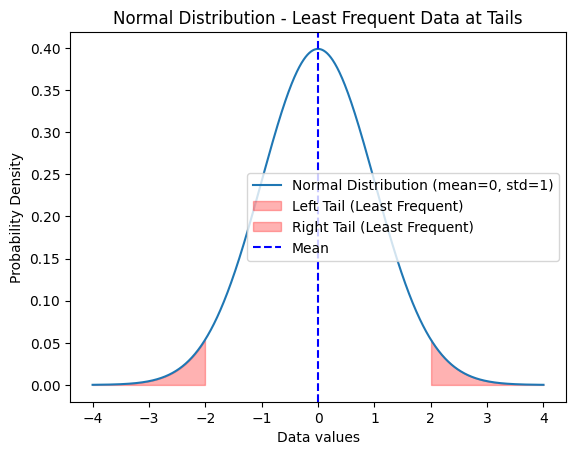

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for normal distribution
mu = 0      # mean
sigma = 1   # standard deviation

# Generate x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
# Calculate normal distribution PDF values
pdf = norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, pdf, label='Normal Distribution (mean=0, std=1)')

# Shade the tails (less frequent regions)
plt.fill_between(x, pdf, where=(x < mu - 2*sigma), color='red', alpha=0.3, label='Left Tail (Least Frequent)')
plt.fill_between(x, pdf, where=(x > mu + 2*sigma), color='red', alpha=0.3, label='Right Tail (Least Frequent)')

# Mark the mean
plt.axvline(mu, color='blue', linestyle='--', label='Mean')

plt.title('Normal Distribution - Least Frequent Data at Tails')
plt.xlabel('Data values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
